In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import re

In [7]:
# total training times: 
time_aivai, time_aivrand = 0, 0
with open("./time_aivai.txt", 'r') as f: 
    for line in f:
        if line.isspace(): 
            break
        else: 
            time = re.sub("[^\d\.]", "", line)
            time_aivai += float(time)
            

with open("./time_aivrand.txt", 'r') as f: 
    for line in f:
        if line.isspace(): 
            break
        else: 
            time = re.sub("[^\d\.]", "", line)
            time_aivrand += float(time)
            
print(time_aivai/3600, time_aivrand/3600)

23.299492777777782 25.738976944444435


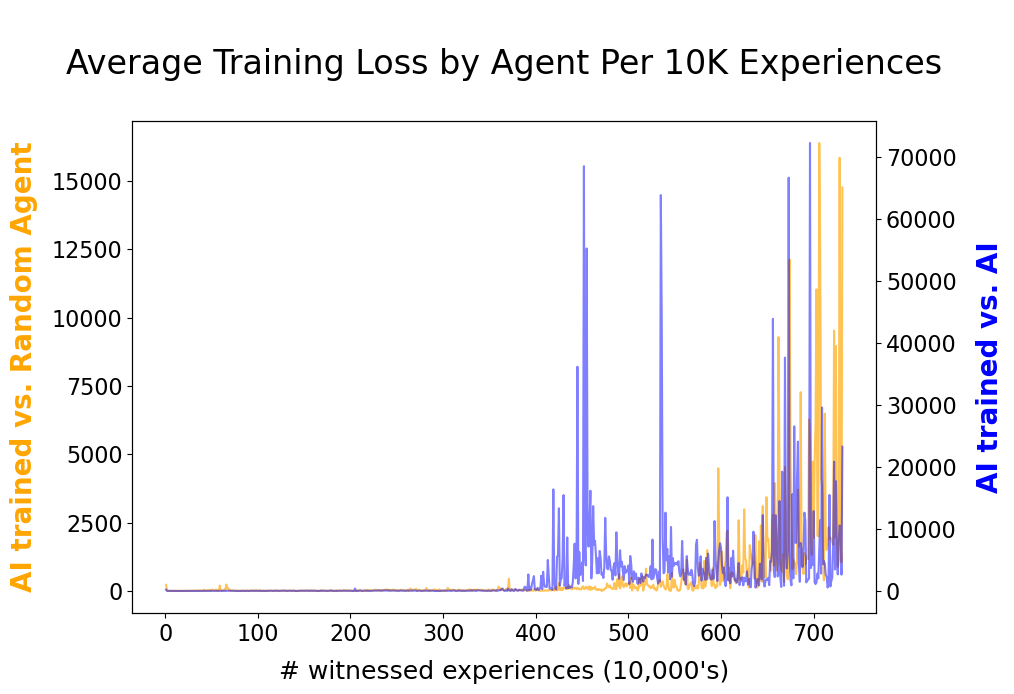

In [7]:
# loss plot: 
loss_aivai, loss_aivrd = [], []
with open("./loss_aivai.txt", 'r') as f: 
    for idx, line in enumerate(f):
        if line.isspace(): 
            break
        else: 
            if idx % 2 == 0:
                loss = re.sub("[^\d\.]", "", line)
                if loss != '':
                    loss_aivai.append(float(loss))
        
with open("./loss_aivrand.txt", 'r') as f: 
    for line in f:
        if line.isspace(): 
            break
        else: 
            loss = re.sub("[^\d\.]", "", line)
            if loss != '':
                loss_aivrd.append(float(loss))
            
if len(loss_aivai) < len(loss_aivrd):
   loss_aivrd = loss_aivrd[: len(loss_aivai)]
elif len(loss_aivai) > len(loss_aivrd):
   loss_aivai = loss_aivai[: len(loss_aivrd)]

expr_count = list(range(1, len(loss_aivai) + 1))
# for i in range(len(expr_count)):
#     expr_count[i] *= 10000

fig,ax = plt.subplots(1,1,
                      figsize=(9.6, 6.4))
ax.plot(expr_count,
        loss_aivrd,
        color='orange', 
        alpha=0.67)
ax.set_xlabel("# witnessed experiences (10,000's)", fontsize = 18, labelpad=10)
ax.set_ylabel("AI trained vs. Random Agent", color="orange", alpha = 1, fontsize=20, labelpad=10, weight='bold')

ax2=ax.twinx()
ax2.plot(expr_count, loss_aivai, color="blue", label='test2', alpha=0.5)
ax2.set_ylabel("AI trained vs. AI", color="blue", alpha = 1, fontsize=20, labelpad=14, weight='bold')

ax.tick_params(axis='both', which='major', labelsize=16)
ax2.tick_params(axis='both', which='major', labelsize=16)

plt.title("\nAverage Training Loss by Agent Per 10K Experiences\n", fontsize=24)
plt.show()

   

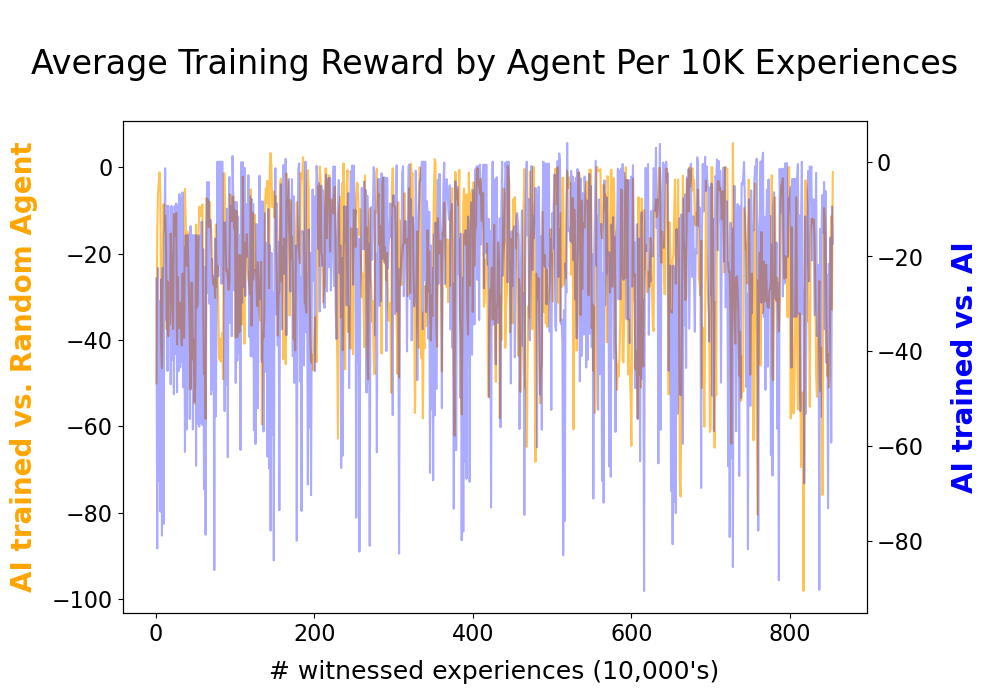

In [6]:
# reward plot: 
loss_aivai, loss_aivrd = [], []
with open("./reward_aivai.txt", 'r') as f: 
    for idx, line in enumerate(f):
        if line.isspace(): 
            break
        else: 
            if idx % 2 == 0:
                loss = re.sub("-[^\d\.]", "", line) 
                if loss != '':
                    loss_aivai.append(float(loss))
        
with open("./reward_aivrand.txt", 'r') as f: 
    for line in f:
        if line.isspace(): 
            break
        else: 
            loss = re.sub("-[^\d\.]", "", line)
            if loss != '':
                    loss_aivrd.append(float(loss))
            
if len(loss_aivai) < len(loss_aivrd):
   loss_aivrd = loss_aivrd[: len(loss_aivai)]
elif len(loss_aivai) > len(loss_aivrd):
   loss_aivai = loss_aivai[: len(loss_aivrd)]
   
expr_count = list(range(1, len(loss_aivai) + 1))

fig,ax = plt.subplots(1,1,
                       figsize=(9.6, 6.4))
ax.plot(expr_count,
        loss_aivrd,
        color='orange', 
        alpha=0.67)
ax.set_xlabel("# witnessed experiences (10,000's)", fontsize = 18, labelpad=10)
ax.set_ylabel("AI trained vs. Random Agent", color="orange", alpha = 1, fontsize=20, labelpad=10, weight='bold')

ax2=ax.twinx()
ax2.plot(expr_count, loss_aivai, color="blue", label='test2', alpha=0.33)
ax2.set_ylabel("AI trained vs. AI", color="blue", alpha = 1, fontsize=20, labelpad=20, weight='bold')

ax.tick_params(axis='both', which='major', labelsize=16)
ax2.tick_params(axis='both', which='major', labelsize=16)

plt.title("\nAverage Training Reward by Agent Per 10K Experiences\n", fontsize=24)
plt.show()
